**Model**  
Suppose we have an image that we are going to enhance spatially. Spatial domain means a domain that contains pixels. Thus, the spatial domain processing can be denoted as:  
     
   $g(x) = T[f(x)]$  
   
where $f(x)$ is an image and $g(x)$ is an image gained from a tranformation function $T$, and $x$ is pixel coordinate of $(x,y)$. 

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Grey-level Transformation**  
Grey-level transformation is the simplest of all image enhancement techniques because of its pixel-based operation.  
  
****A. Negative Image****  
Negative image is the inverted image. This image can be obtained by:  
  
$g(x) = 1 - f(x)$  
  
or  
  
$g(x) = 255 - f(x)$

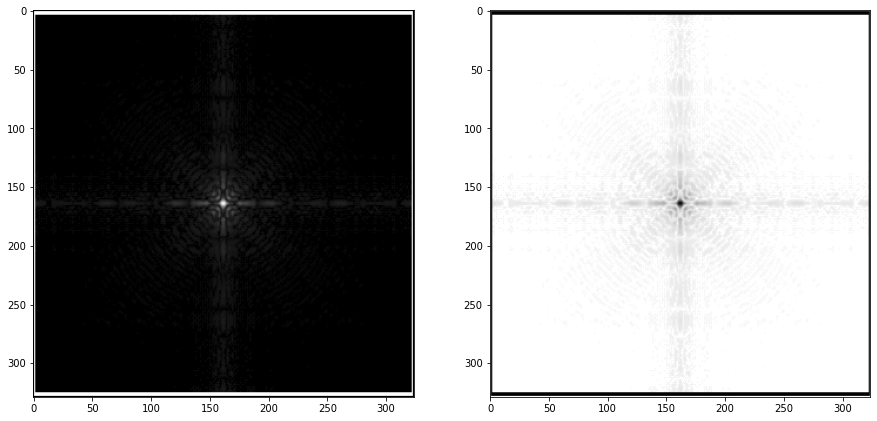

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('dataset/dot.jpg',0)

img_negative = 255 - img

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_negative,cmap="gray")
plt.show()

****B. Log Transformation****  
Is a process on a pixel which based on logarithmic function.   
  
$g(x) = c * log(1 + f(x))$  
where $c$ is a constant and $f(x) \geq 0$

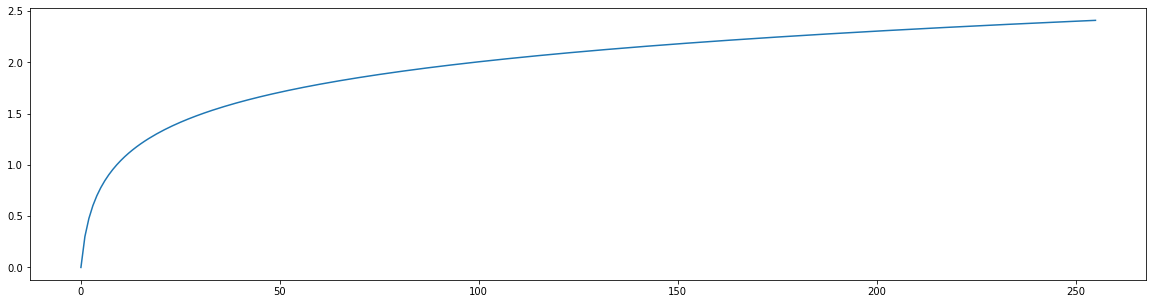

In [4]:
x = np.arange(256)
y = np.log10(x+1)
plt.figure(figsize=(20, 5))
plt.plot(x,y)

plt.show()

<ipython-input-10-6554976038e9>:5: RuntimeWarning: divide by zero encountered in log10
  img_log = c * (np.log10(img + 1))


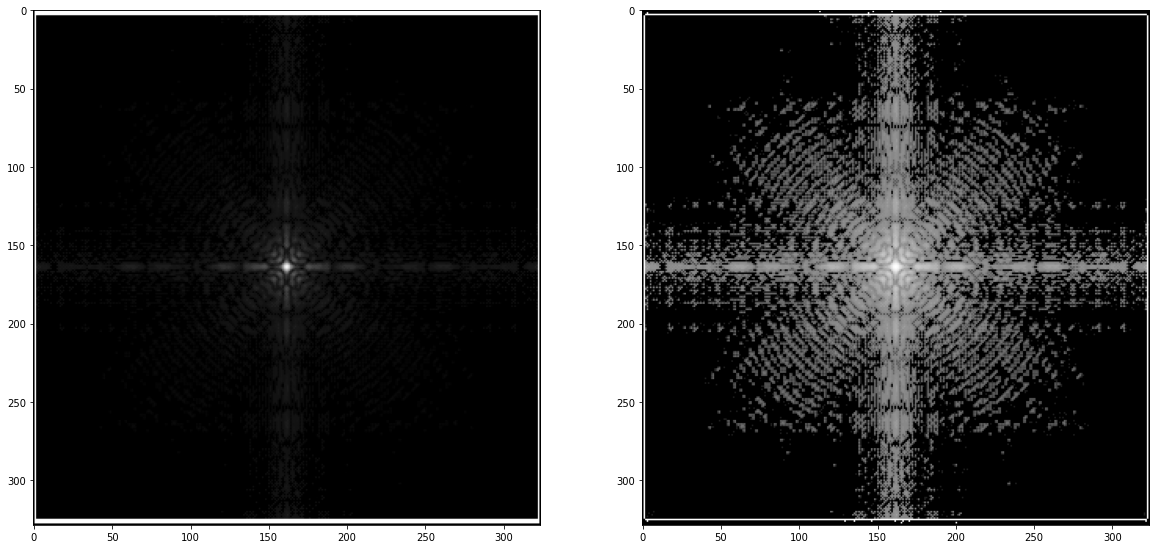

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('dataset/dot.jpg',0)

c = 255 / np.log10(1 + np.max(img))

img_log = c * (np.log10(img + 1))
img_log = np.array(img_log, dtype = np.uint8)
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_log,cmap="gray")
plt.show()

****C. Power Transformation (Gamma)****  
Is a process on a pixel which based on power function.   
  
$r = f(x)$ 
  
$g(x) = c * r^\gamma$  
where $c$ is a constant and $f(x) \geq 0$

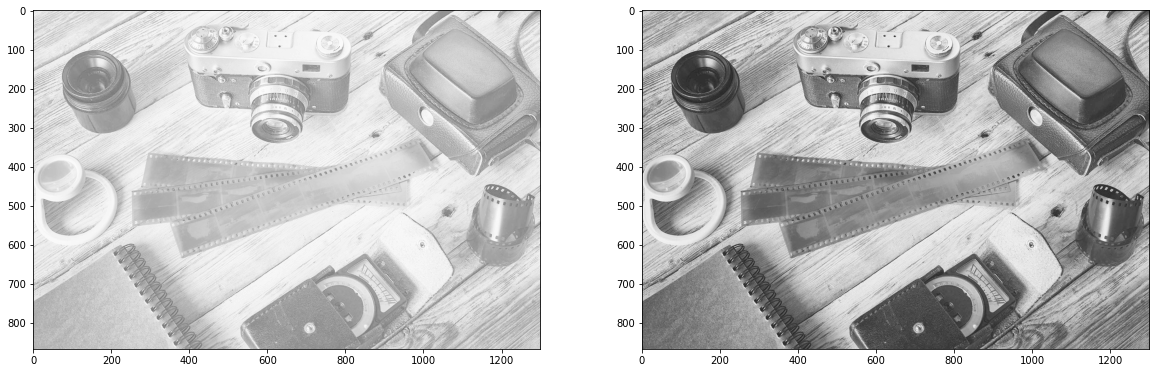

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('dataset/camera.jpg',0)

gamma = 2.5
img_power = img**gamma

plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")

plt.subplot(1,2,2)
plt.imshow(img_power,cmap="gray")

plt.show()

**D. Contrast Stretching**  
  
  There are many contrast enhancement techniques. In this class, we implement one example which is the Min-Max Stretching. For any given pixel position, we can calculate its contrast with:  
  $g(x) = \biggl( \frac{f(x) - min(f(x))}{max(f(x)) - min(f(x))}\biggr) * 255$

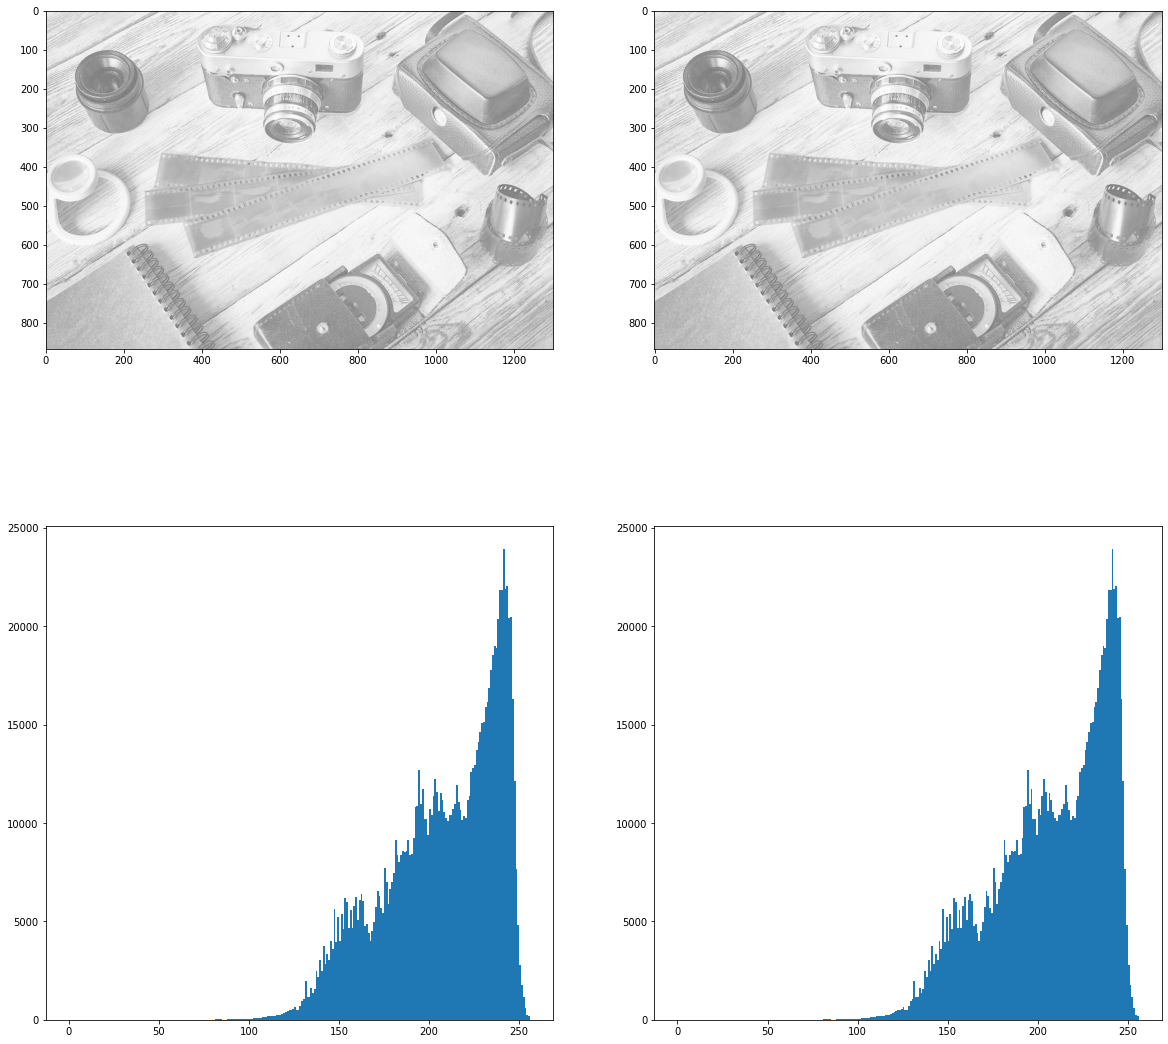

In [6]:
img = cv2.imread('dataset/camera.jpg',0)

# Define parameters.
minmax_img = np.zeros((img.shape[0],img.shape[1]),dtype = 'uint8')
min = np.min(img)
max = np.max(img)

minmax_img = 255 * ((img - min) / (max - min))
# Loop over the image and apply Min-Max formulae
        
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(img,cmap="gray")
plt.subplot(2,2,2)
plt.imshow(minmax_img,cmap="gray")

plt.subplot(2,2,3)
plt.hist(img.ravel(),256,[0,256])

plt.subplot(2,2,4)
plt.hist(minmax_img.ravel(),256,[0,256])

plt.show()